In [21]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential
from keras.regularizers import l2
from keras.utils import to_categorical, plot_model

%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
unique, counts = np.unique(y_train, return_counts=True)
print('Train labels:', dict(zip(unique, counts)))

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [3]:
unique, counts = np.unique(y_test, return_counts=True)
print('Test labels:', dict(zip(unique, counts)))

Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [4]:
indexes = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[indexes]
labels = y_train[indexes]

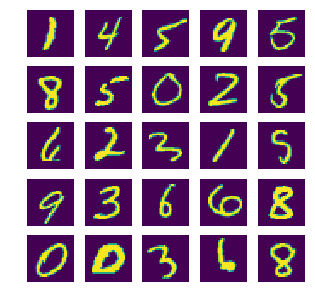

In [5]:
plt.figure(figsize=(5, 5))
for i, img in enumerate(images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
# plt.savefig('mnistSamples.png')

In [6]:
n_labels = len(np.unique(y_train))

# convert to one-hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
image_size = X_train.shape[1]
input_size = image_size * image_size

In [8]:
# Resize, normalize
X_train = np.reshape(X_train, [-1, input_size])
X_train = X_train.astype('float32') / 255
X_test = np.reshape(X_test, [-1, input_size])
X_test = X_test.astype('float32') / 255

In [9]:
BATCH = 128
N_HIDDEN = 256
DROPOUT = 0.45
RATE = 1 - DROPOUT
EPOCHS = 20

In [10]:
mod = Sequential()
mod.add(Dense(N_HIDDEN, input_dim=input_size))
mod.add(Activation('relu'))
mod.add(Dropout(rate=RATE))

mod.add(Dense(N_HIDDEN))
mod.add(Activation('relu'))
mod.add(Dropout(rate=RATE))

mod.add(Dense(n_labels))
mod.add(Activation('softmax'))
mod.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)  

In [11]:
plot_model(mod, to_file='mlp-mnist-MLP.png', show_shapes=True)

In [12]:
mod.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
history = mod.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.5058 - acc: 0.8435
Epoch 2/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.2418 - acc: 0.9287
Epoch 3/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.1962 - acc: 0.9424
Epoch 4/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.1676 - acc: 0.9510
Epoch 5/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.1520 - acc: 0.9546
Epoch 6/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.1426 - acc: 0.9584
Epoch 7/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.1297 - acc: 0.9617
Epoch 8/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.1192 - acc: 0.9636
Epoch 9/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.1135 - acc: 0.9655
Epoch 10/20
60000/60000 [===========================

In [13]:
loss, acc = mod.evaluate(X_test, y_test, batch_size=BATCH)
print(f'Test Acc: {100 * acc:.2f}')

10000/10000 [==============================] - 0s 12us/step
Test Acc: 98.10


In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [18]:
# img dims (assumed square)
image_size = X_train.shape[1]
input_size = image_size# * image_size

# Resize and normalize
X_train = np.reshape(X_train, [-1, input_size])
X_train = X_train.astype('float32') / 255
X_test = np.reshape(X_test, [-1, input_size])
X_test = X_test.astype('float32') / 255

In [20]:
# 3-Layer MLP with ReLU and Dropout
mod = Sequential()
mod.add(Dense(N_HIDDEN, input_dim=input_size))
# alternately:
#mod.add(
#    Dense(N_HIDDEN, kernel_regularizer=l2(0.001), input_dim=input_size))
mod.add(Activation('relu'))
mod.add(Dropout(rate=RATE))
mod.add(Dense(N_HIDDEN))
mod.add(Activation('relu'))
mod.add(Dropout(rate=RATE))
mod.add(Dense(n_labels))
mod.add(Activation('softmax'))
mod.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
__________